In [3]:
import netCDF4 as nc
from netCDF4 import Dataset
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seawater as csr
from matplotlib import cm

In [300]:
# read multiple files
import os
path="/localdata/xiaoxiaoyu/aoml3/"
files=os.listdir(path)
files2=files[:]


def hasNumber(inputString):
    return any(char.isdigit() for char in inputString)   # if there is a digit in a string, and, should start with D
for file in files:
    if not hasNumber(file) or not file.startswith('D'):
        files2.remove(file)         # remove all the items has no digit 
files=files2
len(files)

24

In [550]:
nc=Dataset(path+files[14])
nc.set_auto_mask(False)
date0 = datetime.strptime((nc.variables['REFERENCE_DATE_TIME'][:]).tostring().decode('utf-8'),"%Y%m%d%H%M%S")
pres=nc.variables['PRES']


date=[]
lat=[]
lon=[]
temp=[]
salt=[]
for file in files:
    if not os.path.isdir(file):
        f=Dataset(path+"/"+file)
        f.set_auto_mask(False)
        date_f=date0+timedelta(days=f.variables['JULD'][:][0])       #deal with the datetime
        date.append(date_f)
        lat_f=f.variables['LATITUDE'][:]
        lat.append(lat_f[0])
        lon_f=f.variables['LONGITUDE'][:]
        lon.append(lon_f[0])
        temp_f=f.variables['TEMP'][:]
        temp.append(temp_f[0])
        salt_f=f.variables['PSAL'][:]
        salt.append(salt_f[0])
len(pres[:][0])


76

In [552]:
# define a dictionary for argo, put the information on it 
days=[date_f.day for date_f in date]       # define the argo float locations
numbers=np.arange(24)

argo={ 
    "number" : numbers,
    "day" : days,
    "lat" : lat,
    "lon" : lon,
    "temp": temp,
    "salt":salt
}

In [553]:
lon

[-79.8980026245117,
 -79.7509994506836,
 -66.32599639892578,
 -59.13100051879883,
 -54.13800048828125,
 -54.744998931884766,
 -54.9370002746582,
 -52.3129997253418,
 -52.7599983215332,
 -59.207000732421875,
 -53.611000061035156,
 -51.176998138427734,
 -58.22700119018555,
 -57.78200149536133,
 -65.03199768066406,
 -64.875,
 -55.194000244140625,
 -55.03799819946289,
 -55.3390007019043,
 -51.6349983215332,
 -52.034000396728516,
 -55.9379997253418,
 -56.604000091552734,
 -50.00699996948242]

In [579]:
day1_1=argo["days"][15];lat1_1=argo["lat"][15];lon1_1=argo["lon"][15];temp1_1=argo["temp"][15];salt1_1=argo["salt"][15]
day1_2=argo["days"][14];lat1_2=argo["lat"][14];lon1_2=argo["lon"][14];temp1_2=argo["temp"][14];salt1_2=argo["salt"][14]


KeyError: 'days'

In [632]:
argo["lat"][15]

16.94300079345703

In [633]:
argo["lon"][15]

-64.875

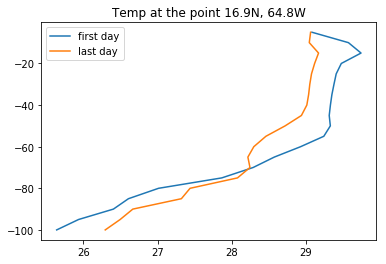

In [304]:
# draw the profile of two temps
t=-pres[:][0][0:20]
data1=temp1_1[0:20]
data2=temp1_2[0:20]
plt.plot(data1, t,linestyle='solid',label='first day')
plt.title('Temp at the point 16.9N, 64.8W')
plt.plot(data2, t,linestyle='solid',label='last day')
plt.legend()

In [351]:
temp_1[]
temp[ind_10m]-0.2: 29.375

array([29.083, 29.575, 29.745, 29.479, 29.41 , 29.38 , 29.352, 29.332,
       29.316, 29.331, 29.243, 28.93 , 28.575, 28.29 , 27.867, 27.014,
       26.608, 26.405, 25.935, 25.64 ], dtype=float32)

In [389]:
z=cresm_depth
import math
np.where((z<-9)&(z>-11))[0][0]

1

In [489]:
# calculate the mld by temperature
def mld_temp(temp, z):
    # default: 10m layer is in the ind=1 layer 
    # ind_10m=np.where((z<-9)&(z>-11))[0][0]
    ind_10m=1
    for index, dep in enumerate(z[ind_10m::]):
        if temp[index+ind_10m]<temp[ind_10m]-0.2:
            return dep
            break

In [628]:
# http://www.ifremer.fr/cerweb/deboyer/mld/Surface_Mixed_Layer_Depth.php 
# calculate density mld

def mld_density(temp,salt,z):
    # temp, salt is 1d, only has the depth
    # default: 10m layer is in the ind=1 layer 
    density_profiles = csr.dens(salt, temp, -1*z)  #the origianl density
    print(density_profiles)
    # calculate the critical density 
    #ind_10m=np.where((z<-9)&(z>-11))[0][0]
    ind_10m=1
    delta_density=csr.dens(salt[ind_10m], temp[ind_10m]-0.2, -1*z[0])-csr.dens(salt[ind_10m], temp[ind_10m], -1*z[0])
    
    density_zero=density_profiles[ind_10m]+delta_density
    
    rou0=min(density_profiles, key=lambda x:abs(x-density_zero))
    ind=np.argwhere(density_profiles==rou0)
    if ind.size==0:
        return None
    else:
        return z[ind][0][0]

In [652]:
# http://www.ifremer.fr/cerweb/deboyer/mld/Surface_Mixed_Layer_Depth.php 
# calculate density mld
#  计算位势密度

def mld_density(temp,salt,z):
    # temp, salt is 1d, only has the depth
    # default: 10m layer is in the ind=1 layer 
    density_profiles = csr.dens(salt, temp, 0)  #the origianl density
    
    # calculate the critical density 
    #ind_10m=np.where((z<-9)&(z>-11))[0][0]
    ind_10m=1
    delta_density=csr.dens(salt[ind_10m], temp[ind_10m]-0.2, 0)-csr.dens(salt[ind_10m], temp[ind_10m], 0)
#     print(delta_density)
    density_zero=density_profiles[ind_10m]+delta_density
    
    rou0=min(density_profiles, key=lambda x:abs(x-density_zero))
    ind=np.argwhere(density_profiles==rou0)
    if ind.size==0:
        return None
    else:
        return z[ind][0][0]

In [478]:


def plot_profile_blt_twolines(temp1,salt1,temp2,salt2,depth,point_str):
    # use temp and salt to calulate density, then use depth to calculate BLT, ILD, MLD
    #  plot two files with the ILD, MLD lines
    #  point_str,date are string
    #  plot four lines together (before hurricane and after hurricane)  
    from mpl_toolkits.axes_grid1 import host_subplot
    import mpl_toolkits.axisartist as AA
    
    t=depth
    dens1 = csr.dens(salt1, temp1, -1*t)   # use this function to calulate density
    dens2 = csr.dens(salt2, temp2, -1*t)     

#     fig, ax1 = plt.subplots()
    fig = plt.figure(1, (6, 8))
    plt.subplots_adjust(top=0.5,right=0.4)
    ax1 = host_subplot(111, axes_class=AA.Axes)
    
    # print('depth of point ',point_str)
    color = 'tab:red'
    ax1.set_xlabel('temp (.C)', color=color)
    ax1.set_ylabel(point_str, color='black')
    ax1.plot(temp1, t, color=color,label="Temp before Hurricane")
    ax1.plot(temp2, t, color=color, linestyle='dashed',label="Temp after Hurricane")       
    ax1.tick_params(axis='x', labelcolor=color)
    ax1.grid(True, linestyle='-.',lw=0.6)
    
    ild1=int(mld_temp(temp1, t))
    ild2=int(mld_temp(temp2, t))
    tempmin=24
    tempmax=30 
    ax1.set_xlim(tempmin, tempmax)
    ax1.plot([tempmin, tempmax], [ild1, ild1], linestyle ='-',lw=3, color=color)
    ax1.plot([tempmin, tempmax], [ild2, ild2], linestyle ='--',lw=3, color=color)
    ax1.text(tempmax, ild1, ' MLD '+str(ild1), fontsize=12, color=color)
    ax1.text(tempmax, ild2, ' MLD '+str(ild2), fontsize=12, color=color)
#     ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.4))
    
    
    ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
     
    ax2.plot(dens1,t, color=color,label="Density before Hurricane")
    ax2.plot(dens2,t, color=color, linestyle='dashed',label="Density after Hurricane")
    
    
          #设置坐标轴摆放位置和距离
    offset = -10
    new_fixed_axis = ax2.get_grid_helper().new_fixed_axis
    ax2.axis["top"] = new_fixed_axis(loc="top",axes=ax2,offset=( 0,offset))
    ax2.axis["top"].toggle(all=True)
    ax2.set_xlabel('Density (kg/m3)', color=color)  # we already handled the x-label with ax1
    ax2.tick_params(axis='top', labelcolor=color)
     
    mld1=int(mld_density(temp1,salt1,t))
    mld2=int(mld_density(temp2,salt2,t))
    densmin=1021
    densmax=1026
    ax2.set_xlim(densmin, densmax)
    ax2.plot([densmin, densmax], [mld1, mld1], linestyle ='-',lw=3, color=color)
    ax2.plot([densmin, densmax], [mld2, mld2], linestyle ='--',lw=3, color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    ax2.text(densmax, mld1, ' ILD '+str(mld1), fontsize=12, color=color)
    ax2.text(densmax, mld2, ' ILD '+str(mld2), fontsize=12, color=color)
    
    
    
    ax3 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'orange'
    ax3.plot(salt1,t, color=color,label="Salinity before Hurricane")
    
    saltmin= 34.8
    saltmax= 37
    ax3.set_xlim(saltmin, saltmax)
    
    #设置坐标轴摆放位置和距离
    offset = 40
    new_fixed_axis = ax3.get_grid_helper().new_fixed_axis
    ax3.axis["top"] = new_fixed_axis(loc="bottom",axes=ax3,offset=( 0,offset))
    ax3.axis["top"].toggle(all=True)
    ax3.set_xlabel('Salinity (psu)', color=color)
    ax3.tick_params(axis='top', labelcolor=color)
    
    plt.legend(loc='lower left', bbox_to_anchor=(0.05, 0.1))
    return plt.show()


In [621]:
depth

array([  -5.,  -10.,  -15.,  -20.,  -25.,  -30.,  -35.,  -40.,  -45.,
        -50.,  -55.,  -60.,  -65.,  -70.,  -75.,  -80.,  -85.,  -90.,
        -95., -100.], dtype=float32)

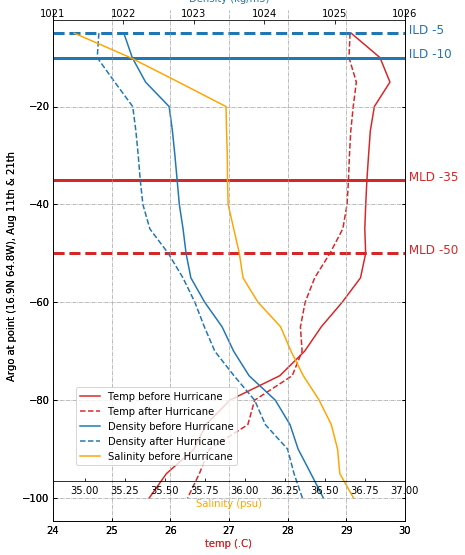

In [742]:
# plot another point in the non plume area 
path_21="/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/argo_200704/before/"
filename_21='D4900750_056.nc'
nc_21=Dataset(path_21+filename_21)
nc_21.set_auto_mask(False)

temp1_21=np.squeeze(nc_21.variables['TEMP'][:])
salt1_21=np.squeeze(nc_21.variables['PSAL'][:])

temp_21=temp1_21[0:20]
salt_21=salt1_21[0:20]

path_22="/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/argo_200704/after/"
filename_22='D4900750_057.nc'
nc_22=Dataset(path_22+filename_22)
nc_22.set_auto_mask(False)

temp1_22=np.squeeze(nc_22.variables['TEMP'][:])
salt1_22=np.squeeze(nc_22.variables['PSAL'][:])
temp_22=temp1_22[0:20]
salt_22=salt1_22[0:20]

pres=nc_22.variables['PRES']
depth_22=-pres[:][0][0:20]
print(temp_21[0])
print(temp_22[0])

28.581
29.311


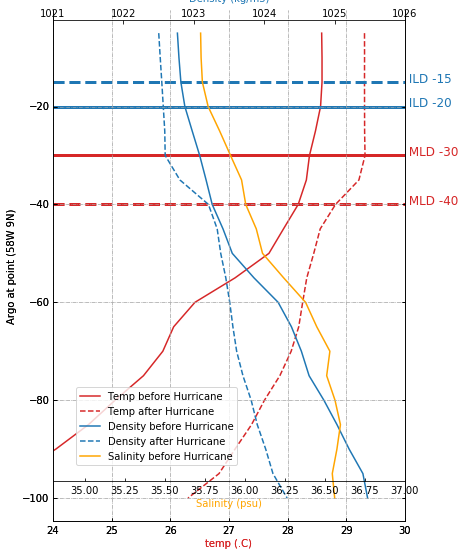

In [743]:
point_str="Argo at point (58W 9N)"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

27.255
27.551
0.06463689999009148
0.06504017329348244


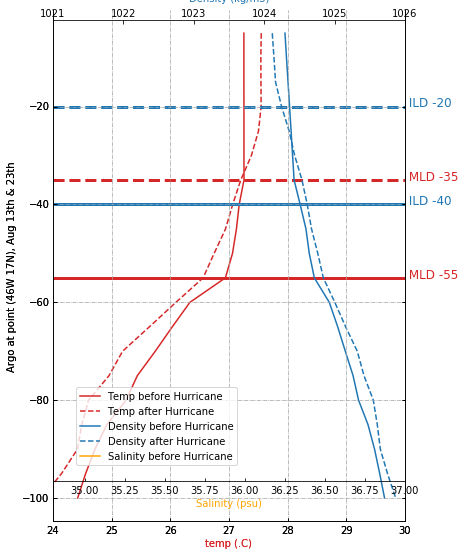

In [648]:
point_str="Argo at point (46W 17N), Aug 13th & 23th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

27.314
27.561
0.06462025363566681
0.06609814524722424


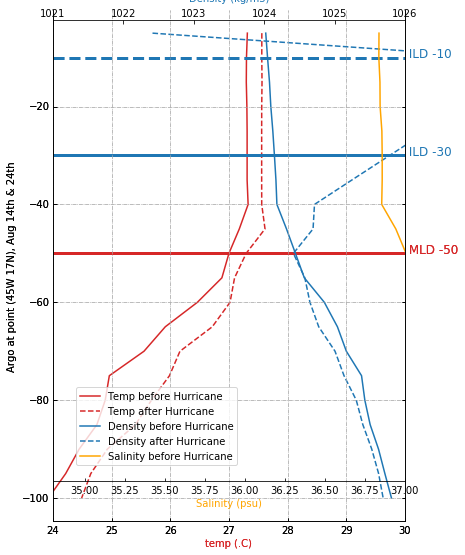

In [647]:
point_str="Argo at point (45W 17N), Aug 14th & 24th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

27.247
27.536
0.0646386050698311
0.06632109795032193


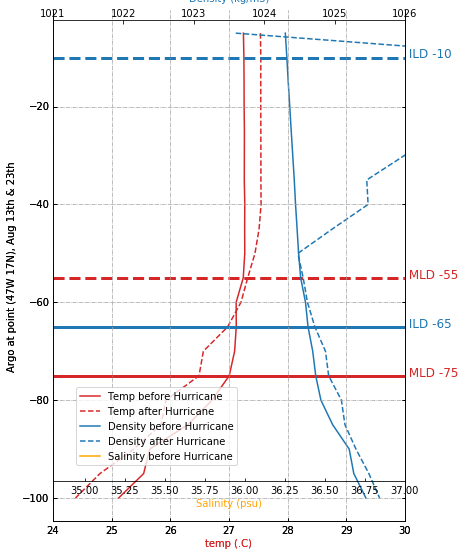

In [646]:
point_str="Argo at point (47W 17N), Aug 13th & 23th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

27.323
27.523
0.06454302033364456
0.06486349158751636


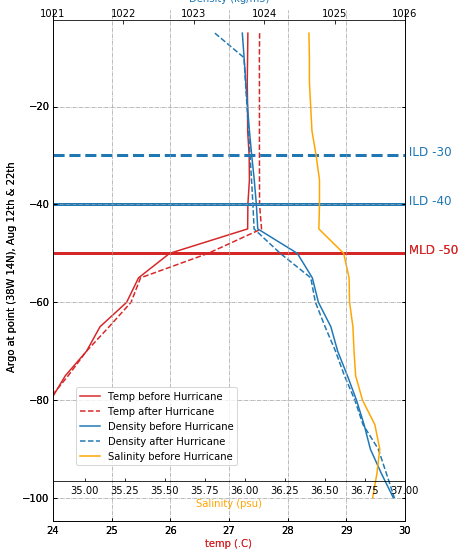

In [645]:
point_str="Argo at point (38W 14N), Aug 12th & 22th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

27.498
27.967
0.06599968015257218
0.06542284632735118


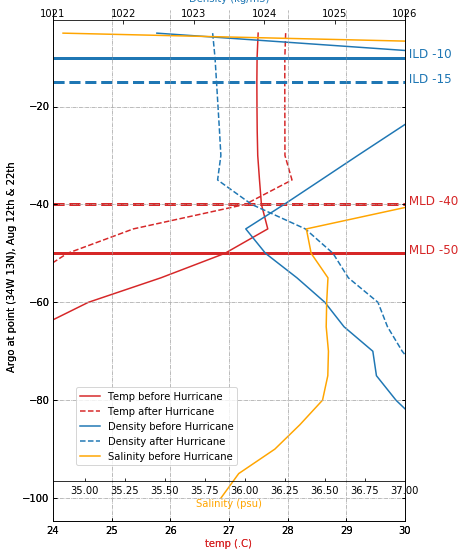

In [644]:
point_str="Argo at point (34W 13N), Aug 12th & 22th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

27.787
28.058
0.06506778697473692
0.06546707387008155


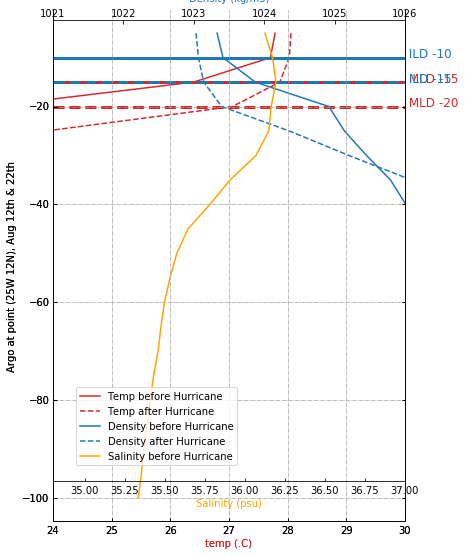

In [643]:
point_str="Argo at point (25W 12N), Aug 12th & 22th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

26.259
27.123
0.06298224944703179
0.0642734499638209


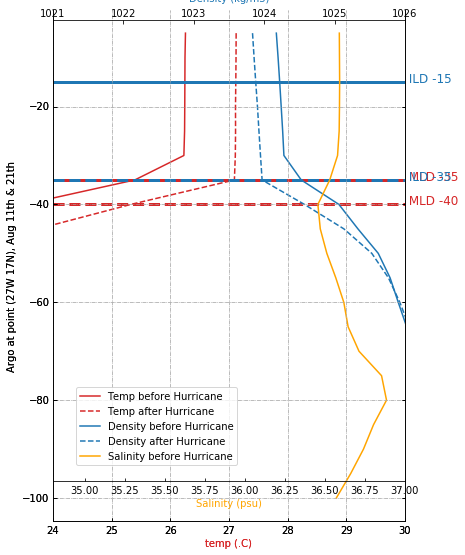

In [642]:
point_str="Argo at point (27W 17N), Aug 11th & 21th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

28.015
27.908
0.06552206760477475
0.0653311608423337


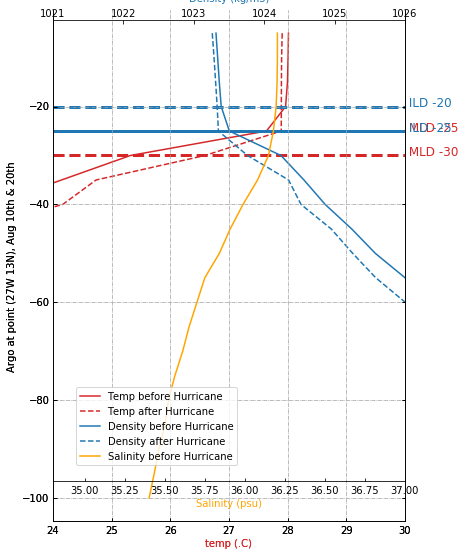

In [641]:
point_str="Argo at point (27W 13N), Aug 10th & 20th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

26.288
26.571
0.06294871441241412
0.06342983591525808


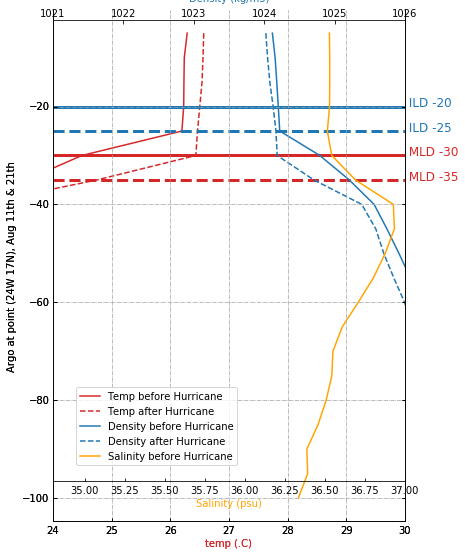

In [640]:
point_str="Argo at point (24W 17N), Aug 11th & 21th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

27.575
27.683
0.06488513909323501
0.0649177210967764


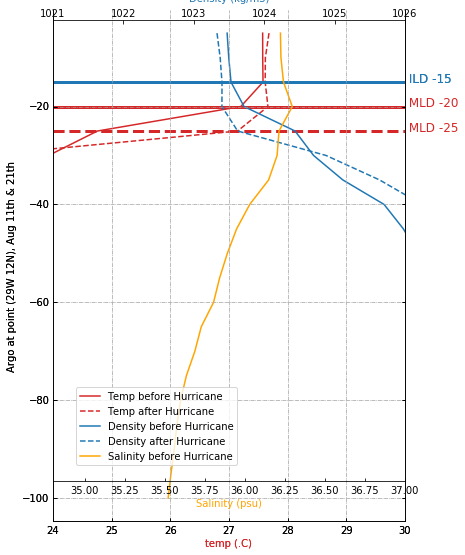

In [639]:
point_str="Argo at point (29W 12N), Aug 11th & 21th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

27.993
27.769
0.06508803258475382
0.06503692587159549


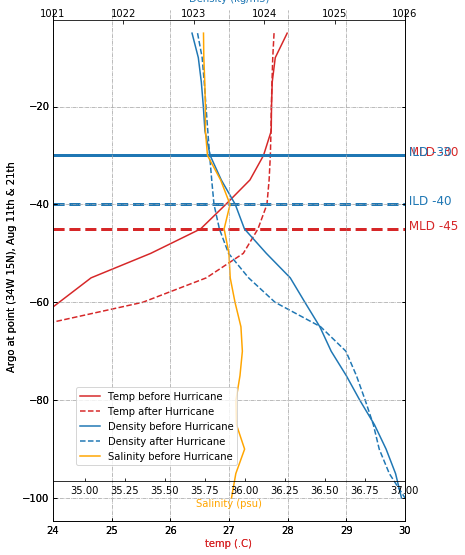

In [637]:
point_str="Argo at point (34W 15N), Aug 11th & 21th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

0.06182083472640443
0.061669924680018084


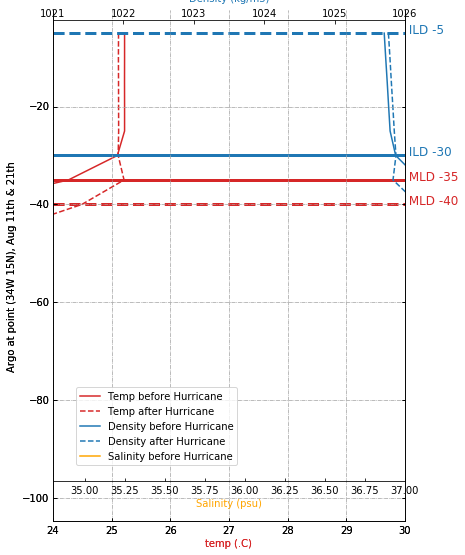

0.06273168868619905
0.06309305852937541


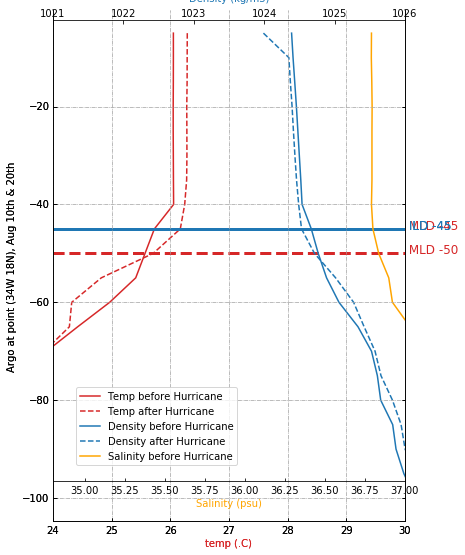

In [631]:
point_str="Argo at point (34W 18N), Aug 10th & 20th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

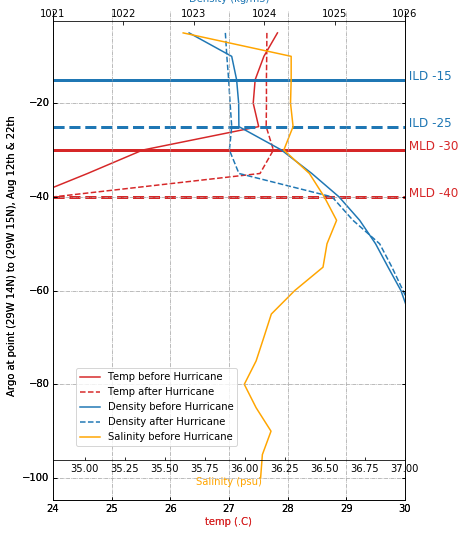

In [618]:
point_str="Argo at point (29W 14N) to (29W 15N), Aug 12th & 22th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

27.993
27.769


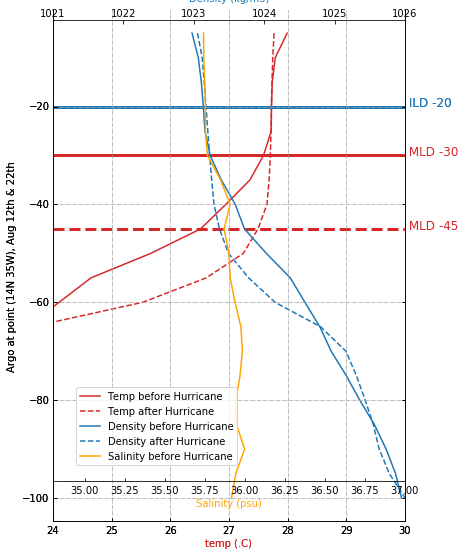

In [613]:
point_str="Argo at point (14N 35W), Aug 12th & 22th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

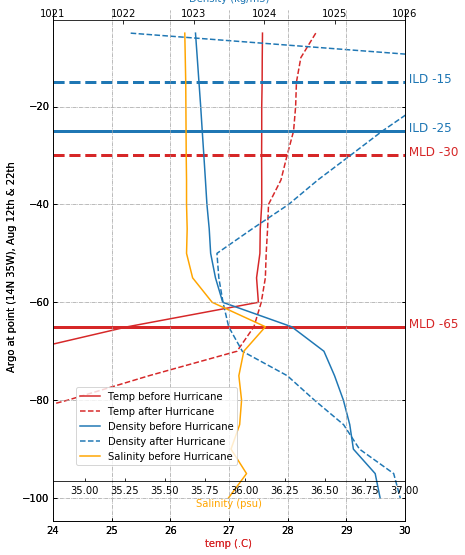

In [726]:


def plot_profile_blt_oneline(temp1,salt1,depth,point_str):
    # use temp and salt to calulate density, then use depth to calculate BLT, ILD, MLD
    #  plot the ILD, MLD lines
    #  add the salinity 
    #  point_str,date are string 

    t=depth
    dens1 = csr.dens(salt1, temp1, -1*t)   # use this function to calulate density  
    
    from mpl_toolkits.axes_grid1 import host_subplot
    import mpl_toolkits.axisartist as AA

    fig = plt.figure(1, (6, 8))
#     plt.subplots_adjust(top=0.5,right=0.4)
#     fig = plt.figure(1, (8, 6))
#     plt.subplots_adjust(top=0.75,right=0.9)
    ax1 = host_subplot(111, axes_class=AA.Axes)
#     fig.add_subplot(ax1)
    # print('depth of point ',point_str)
    color = 'tab:red'
    ax1.set_xlabel('Temp (.C)', color=color)
    ax1.set_ylabel(point_str, color='black')
    ax1.plot(temp1, t, color=color,label="before ILD")       
    ax1.tick_params(axis='x', labelcolor=color)
    ax1.grid(True, linestyle='-.',lw=0.4)
    
    ild1=int(mld_temp(temp1, t))
    tempmin=24
    tempmax=30 
    ax1.set_xlim(tempmin, tempmax)
    ax1.plot([tempmin, tempmax], [ild1, ild1], linestyle ='--',lw=1, color=color)
    ax1.text(tempmax, ild1, ' MLD'+str(ild1), fontsize=10, color=color)
#     ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.4))  
    
    ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'black'
    ax2.plot(dens1,t, color=color,label="before MLD")
    
#     plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.6))
    mld1=int(mld_density(temp1,salt1,t))
    densmin=1021
    densmax=1026
    ax2.set_xlim(densmin, densmax)
    ax2.plot([densmin, densmax], [mld1, mld1], linestyle ='--',lw=1, color=color)
#     fig.tight_layout()  # otherwise the right y-label is slightly clipped
    ax2.text(densmax, mld1,' ILD'+str(mld1), fontsize=10, color=color)
      #设置坐标轴摆放位置和距离
    offset = 0
    new_fixed_axis = ax2.get_grid_helper().new_fixed_axis
    ax2.axis["top"] = new_fixed_axis(loc="top",axes=ax2,offset=( 0,offset))
    ax2.axis["top"].toggle(all=True)
    ax2.set_xlabel('Density (kg/m3)', color=color)  # we already handled the x-label with ax1
    ax2.tick_params(axis='x', labelcolor=color)
    

    ax3 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax3.plot(salt1,t, color=color,label="salinity")
    
    saltmin= 34.8
    saltmax= 41.8
    ax3.set_xlim(saltmin, saltmax)
    
    #设置坐标轴摆放位置和距离
    offset = 40
    new_fixed_axis = ax3.get_grid_helper().new_fixed_axis
    ax3.axis["top"] = new_fixed_axis(loc="top",axes=ax3,offset=( 0,offset))
    ax3.axis["top"].toggle(all=True)
    ax3.set_xlabel('Salinity (psu)', color=color)
    ax3.tick_params(axis='top', labelcolor=color)
    

#     fig.tight_layout()
    return plt.show()


In [340]:
temp_1=temp1_1[0:20]
salt_1=salt1_1[0:20]
depth=-pres[:][0][0:20]
temp_2=temp1_2[0:20]
salt_2=salt1_2[0:20]

In [739]:
# plot another point in the non plume area 
path_21="/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/argo_200704/before/"
filename_21='D4900750_056.nc'
nc1_1=Dataset(path_21+filename_21)
nc1_1.set_auto_mask(False)

temp1_1=np.squeeze(nc1_1.variables['TEMP'][:])
salt1_1=np.squeeze(nc1_1.variables['PSAL'][:])

temp_1=temp1_1[0:20]
salt_1=salt1_1[0:20]
depth=-pres[:][0][0:20]

34.15


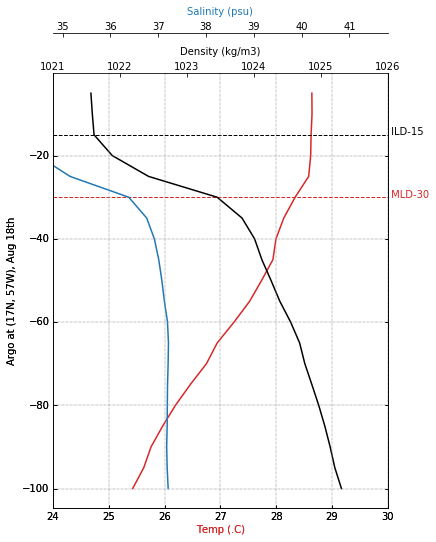

In [735]:
point_str="Argo at (17N, 57W), Aug 18th"
print(salt_1[0])
plot_profile_blt_oneline(temp_1,salt_1,depth,point_str)

26.729


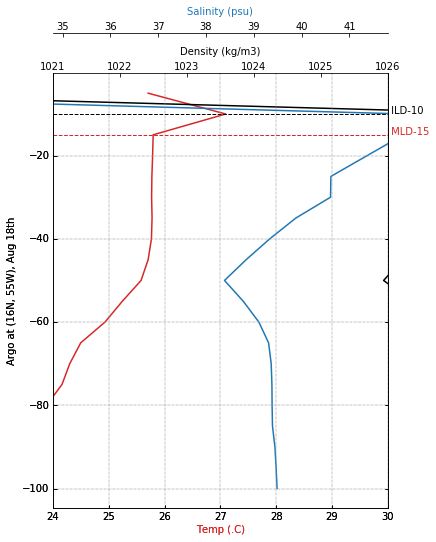

In [733]:
point_str="Argo at (16N, 55W), Aug 18th"
print(salt_1[0])
plot_profile_blt_oneline(temp_1,salt_1,depth,point_str)

34.933


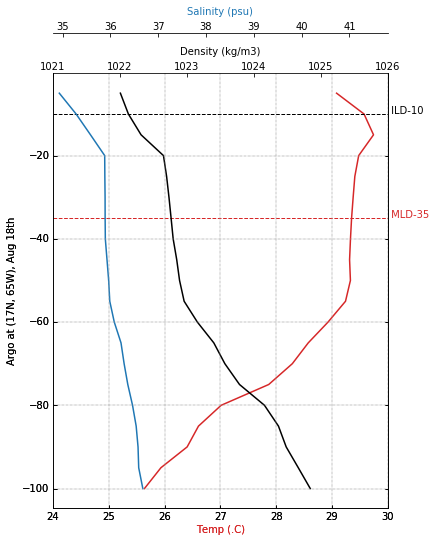

In [731]:
point_str="Argo at (17N, 65W), Aug 18th"
print(salt_1[0])
plot_profile_blt_oneline(temp_1,salt_1,depth,point_str)

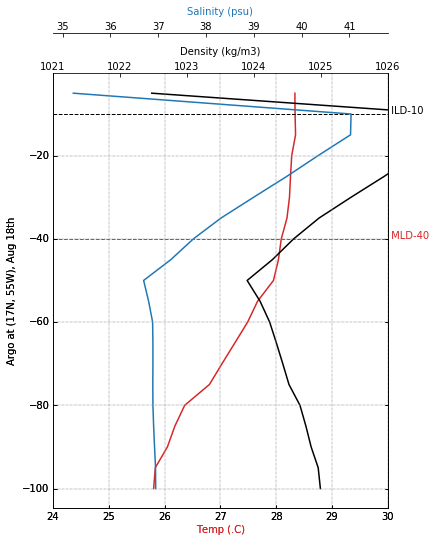

In [727]:
point_str="Argo at (17N, 55W), Aug 18th"

plot_profile_blt_oneline(temp_1,salt_1,depth,point_str)

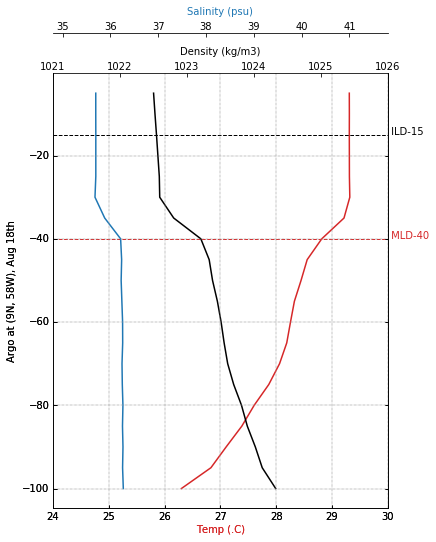

In [737]:

point_str="Argo at (9N, 58W), Aug 18th"

plot_profile_blt_oneline(temp_1,salt_1,depth,point_str)

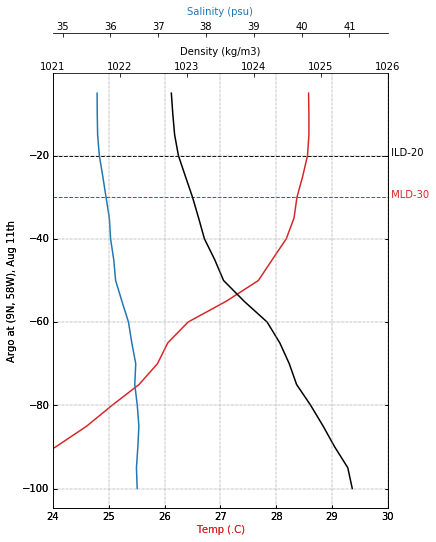

In [740]:

point_str="Argo at (9N, 58W), Aug 11th"

plot_profile_blt_oneline(temp_1,salt_1,depth,point_str)

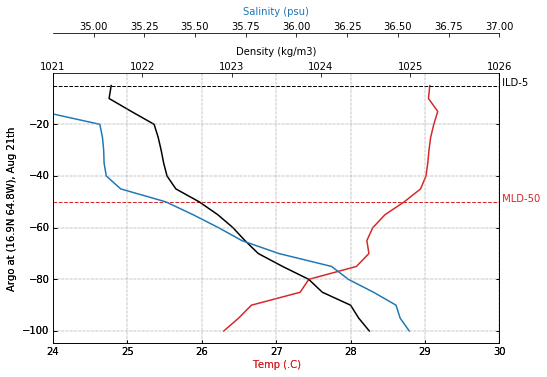

In [396]:
point_str="Argo at (16.9N 64.8W), Aug 21th"
plot_profile_blt_oneline(temp_2,salt_2,depth,point_str)

# CRESM results

In [655]:
# analysis the CRESM results
nc2=Dataset(path+'TXGLO.ocn.hi.2007-08-14_21:00:00.nc')
nc3=Dataset(path+'TXGLO.ocn.hi.2007-08-20_21:00:00.nc')
nc2.set_auto_mask(False)
nc3.set_auto_mask(False)
temp3=nc3.variables["temp"][0,::-1,:,:]
temp2=nc2.variables["temp"][0,::-1,:,:]
salt3=nc3.variables["salt"][0,::-1,:,:]
salt2=nc2.variables["salt"][0,::-1,:,:]

temp3=np.squeeze(temp3)  #删除没有必要的维度
temp2=np.squeeze(temp2)
salt3=np.squeeze(salt3)
salt2=np.squeeze(salt2)

In [399]:
def roms_zlevel(h,zeta,theta_s,theta_b,hc, N,type,**kwargs):
        '''
        Z = roms_zlevel(H,ZETA,THETA_S,THETA_B,HC,N,TYPE,**kwargs)
        computes the z-level depth by the input variables. Input variables are:

                H                         :  Bathymetry
                ZETA              :  Surface elevation referred to undisturbance sea level
                THETA_S   :  S-coordinate surface control parameter
                THETA_B   :  S-coordinate bottom  control parameter
                HC                       :  Critical depth (TCLINE) in meters (positive) controlling
                                                        the stretching
                N                         :  Number of vertical level. If TYPE = 'w', Z has N+1 level
                TYPE              :  'r' or 'R' for rho point and 'w' or 'W' for w point

        Z = roms_zlevel(H,ZETA,THETA_S,THETA_B,HC,N,TYPE,vtran=vtran,vstre=vstre)
                **kwargs
                        vtran           :  Vertical transformation equation switch, a numerical 
                                                        value either 1 or 2 (default)
                        vstre           :  Vertical stretching function swith, a numerical value
                                                        from 1 to 4 (default)
        Created by C.Y. Hsu @TAMU, Dept Oceanography, 2013
        '''
        vstre = kwargs.pop('vstre',4)
        vtran = kwargs.pop('vtran',2)
        if type.lower() == 'w': sc = (np.arange(0,N+1.)-N)/N; N=N+1;
        if type.lower() == 'r': sc = (np.arange(1,N+1.)-N-0.5)/N
#--  switch case:  vstre
        if      vstre == 1:
                if theta_s != 0: Cs =(1-theta_b)*np.sinh(theta_s*sc)/np.sinh(theta_s)+\
                                                          theta_b*(-0.5+0.5*np.tanh(theta_s*(sc+0.5))/np.tanh(0.5*theta_s))
                if theta_s == 0: Cs =sc

        elif vstre == 2:
                alpha =1; beta = 1;
                if theta_s > 0:
                        Csur=(1-np.cosh(theta_s*sc))/(np.cosh(theta_s)-1)
                        if theta_b >0:
                                Cbot = -1 +(np.sinh(theta_b*(sc+1)))/np.sinh(theta_b)
                                Cweight=((sc+1)**alpha)*(1+(alpha/beta)*(1-(sc+1)**beta))
                                Cs=Cweight*Csur+(1-Cweight)*Cbot
                        else: Cs=Csur
                else: Cs=sc

        elif vstre == 3:
                alpha=theta_s;beta=theta_b;Hscale=3;
                Csur=-np.log(np.cosh(Hscale*(abs(sc)**alpha)))/np.log(np.cosh(Hscale))
                Cbot= np.log(np.cosh(Hscale*((sc+1)**beta)))  /np.log(np.cosh(Hscale))-1
                Cweight=0.5*(1-np.tanh(Hscale*(sc+0.5)))
                Cs=Cweight*Cbot+(1-Cweight)*Csur

        elif vstre == 4:
                if theta_s > 0:
                        Csur=(1-np.cosh(theta_s*sc))/(np.cosh(theta_s)-1)
                else: Csur=-sc**2
                if theta_b > 0:
                        Cs=(np.exp(theta_b*Csur)-1)/(1-np.exp(-theta_b))
                else: Cs=Csur
#--  end                

#       im,jm = h.shape
#       z = np.zeros((N,im,jm))
        z = []
        if      vtran == 1:
                for k in range(N):
                        z0 = hc*sc[k]+(h-hc)*Cs[k]
                        #z[k,:,:]=z0+zeta*(1.+z0/h)
                        z.append( z0+zeta*(1.+z0/h) )
        elif vtran == 2:
                for k in range(N):
                        z0 = (hc*sc[k]+h*Cs[k])/(hc+h)
                        #z[k,:,:]=zeta+(zeta+h)*z0
                        z.append( zeta+(zeta+h)*z0 )

        z = np.array(z)
        return np.squeeze(z)

In [400]:
# calculate depth from ROMS output. 
def get_const(nc2):
    h=nc2.variables['h'][:]
    zeta=nc2.variables['zeta'][:]
    theta_s=nc2.variables['theta_s'][0]
    theta_b=nc2.variables['theta_b'][0]
    hc=nc2.variables['hc'][:]
    s_rho=nc2.variables['s_rho'][:]
    N=np.shape(s_rho)[0]
    TYPE='R'
    vtran=nc2.variables['Vtransform'][0]
    vstre=nc2.variables['Vstretching'][0]
    return h,zeta,theta_s,theta_b,hc, N,TYPE,vtran,vstre
h,zeta,theta_s,theta_b,hc, N,TYPE,vtran,vstre=get_const(nc2)
z=roms_zlevel(h,zeta,theta_s,theta_b,hc,N,TYPE,vtran=vtran,vstre=vstre)

In [656]:
# 处理单点数据，画剖面图
lon0=218
lat0=314
lat_point0=nc2.variables['lat_rho'][lat0,lon0]
lon_point0=nc2.variables['lon_rho'][lat0,lon0]
print(lon_point0)
z[::-1,0,lat0,lon0][0:14]

-64.83333333333334


array([  -3.41220709,  -10.72801096,  -18.07646441,  -25.46013604,
        -32.88300681,  -40.35062938,  -47.87035029,  -55.45160375,
        -63.1062888 ,  -70.84924447,  -78.69884196,  -86.67771673,
        -94.81366935, -103.14076972])

In [657]:
cresm_temp_1=temp2[0:14,lat0,lon0]
cresm_salt_1=salt2[0:14,lat0,lon0]
cresm_depth=z[::-1,0,lat0,lon0][0:14]

cresm_temp_2=temp3[0:14,lat0,lon0]
cresm_salt_2=salt3[0:14,lat0,lon0]

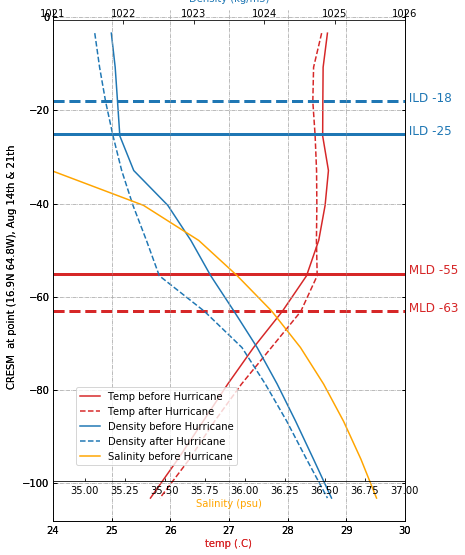

In [658]:
point_str="CRESM  at point (16.9N 64.8W), Aug 14th & 21th"
plot_profile_blt_twolines(cresm_temp_1,cresm_salt_1,cresm_temp_2,cresm_salt_2,cresm_depth,point_str)

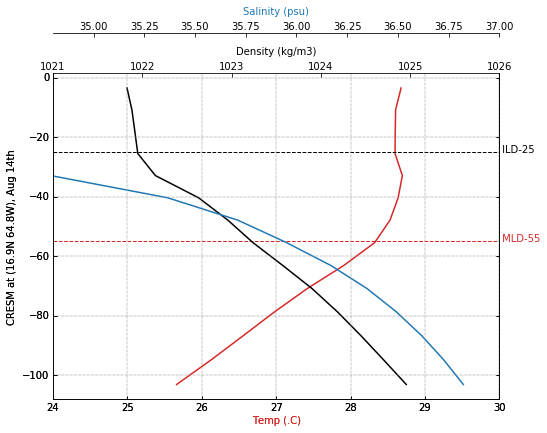

In [590]:
point_str="CRESM at (16.9N 64.8W), Aug 14th"
plot_profile_blt_oneline(cresm_temp_1,cresm_salt_1,cresm_depth,point_str)

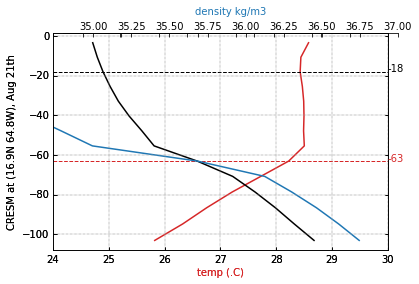

In [417]:
point_str="CRESM at (16.9N 64.8W), Aug 21th"
plot_profile_blt_oneline(cresm_temp_2,cresm_salt_2,cresm_depth,point_str)

[21.831158 21.885542 21.918295 21.950462 22.147404 22.63058  22.957668
 23.239296 23.571268 23.897429 24.182098 24.443815 24.696844 24.952234
 25.20578  25.45597  25.696566 25.926    26.150673 26.371574]


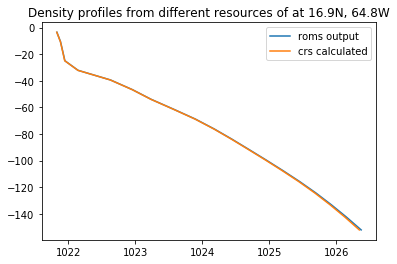

In [591]:
# compare the seawater csr density calculation with the roms output density 
# 确认 计算 density是对的 （和roms输出的density一样，一个公式计算的）

sigma=nc2.variables['rho'][0,::-1,lat0,lon0][0:20]   #roms output dentsity 
dens_1=sigma+np.full_like(sigma, 1000)

t=z[::-1,0,lon0,lat0][0:20]                    #calculate density from temp, salt, using seawater csr 
temp_=nc2.variables['temp'][0,::-1,lat0,lon0][0:20]
salt_=nc2.variables['salt'][0,::-1,lat0,lon0][0:20]
dens_2 = csr.dens( salt_,temp_, -1*t)

line_1=plt.plot(dens_1, t,linestyle='solid', label='roms output')
plt.title('Density profiles from different resources of at 16.9N, 64.8W' )
line_2=plt.plot(dens_2, t,linestyle='solid', label='crs calculated')
plt.legend()
print(sigma)
# dens(S, T, P=0)

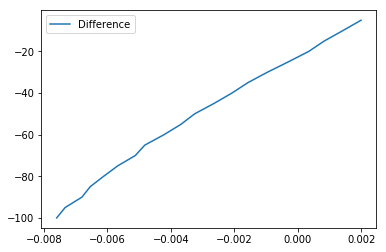

In [297]:
data=dens_1-dens_2
line_1=plt.plot(data, t,linestyle='solid', label='Difference')
plt.legend()

In [30]:
def roms_zlevel(h,zeta,theta_s,theta_b,hc, N,type,**kwargs):
        '''
        Z = roms_zlevel(H,ZETA,THETA_S,THETA_B,HC,N,TYPE,**kwargs)
        computes the z-level depth by the input variables. Input variables are:

                H                         :  Bathymetry
                ZETA              :  Surface elevation referred to undisturbance sea level
                THETA_S   :  S-coordinate surface control parameter
                THETA_B   :  S-coordinate bottom  control parameter
                HC                       :  Critical depth (TCLINE) in meters (positive) controlling
                                                        the stretching
                N                         :  Number of vertical level. If TYPE = 'w', Z has N+1 level
                TYPE              :  'r' or 'R' for rho point and 'w' or 'W' for w point

        Z = roms_zlevel(H,ZETA,THETA_S,THETA_B,HC,N,TYPE,vtran=vtran,vstre=vstre)
                **kwargs
                        vtran           :  Vertical transformation equation switch, a numerical 
                                                        value either 1 or 2 (default)
                        vstre           :  Vertical stretching function swith, a numerical value
                                                        from 1 to 4 (default)
        Created by C.Y. Hsu @TAMU, Dept Oceanography, 2013
        '''
        vstre = kwargs.pop('vstre',4)
        vtran = kwargs.pop('vtran',2)
        if type.lower() == 'w': sc = (np.arange(0,N+1.)-N)/N; N=N+1;
        if type.lower() == 'r': sc = (np.arange(1,N+1.)-N-0.5)/N
#--  switch case:  vstre
        if      vstre == 1:
                if theta_s != 0: Cs =(1-theta_b)*np.sinh(theta_s*sc)/np.sinh(theta_s)+\
                                                          theta_b*(-0.5+0.5*np.tanh(theta_s*(sc+0.5))/np.tanh(0.5*theta_s))
                if theta_s == 0: Cs =sc

        elif vstre == 2:
                alpha =1; beta = 1;
                if theta_s > 0:
                        Csur=(1-np.cosh(theta_s*sc))/(np.cosh(theta_s)-1)
                        if theta_b >0:
                                Cbot = -1 +(np.sinh(theta_b*(sc+1)))/np.sinh(theta_b)
                                Cweight=((sc+1)**alpha)*(1+(alpha/beta)*(1-(sc+1)**beta))
                                Cs=Cweight*Csur+(1-Cweight)*Cbot
                        else: Cs=Csur
                else: Cs=sc

        elif vstre == 3:
                alpha=theta_s;beta=theta_b;Hscale=3;
                Csur=-np.log(np.cosh(Hscale*(abs(sc)**alpha)))/np.log(np.cosh(Hscale))
                Cbot= np.log(np.cosh(Hscale*((sc+1)**beta)))  /np.log(np.cosh(Hscale))-1
                Cweight=0.5*(1-np.tanh(Hscale*(sc+0.5)))
                Cs=Cweight*Cbot+(1-Cweight)*Csur

        elif vstre == 4:
                if theta_s > 0:
                        Csur=(1-np.cosh(theta_s*sc))/(np.cosh(theta_s)-1)
                else: Csur=-sc**2
                if theta_b > 0:
                        Cs=(np.exp(theta_b*Csur)-1)/(1-np.exp(-theta_b))
                else: Cs=Csur
#--  end                

#       im,jm = h.shape
#       z = np.zeros((N,im,jm))
        z = []
        if      vtran == 1:
                for k in range(N):
                        z0 = hc*sc[k]+(h-hc)*Cs[k]
                        #z[k,:,:]=z0+zeta*(1.+z0/h)
                        z.append( z0+zeta*(1.+z0/h) )
        elif vtran == 2:
                for k in range(N):
                        z0 = (hc*sc[k]+h*Cs[k])/(hc+h)
                        #z[k,:,:]=zeta+(zeta+h)*z0
                        z.append( zeta+(zeta+h)*z0 )

        z = np.array(z)
        return np.squeeze(z)

### 计算 温度mixed layer

In [659]:
mld_t2=np.full_like(temp2[0,:,:],None)
mld_t3=np.full_like(temp3[0,:,:],None)
[depth, rows, cols]=temp2.shape
np.shape(mld_t2)

(387, 901)

In [660]:
z1=np.squeeze(z)[::-1,0,:,:]


In [661]:
for i in range(rows-1):
    for j in range(cols-1):
        mld_t2[i,j]=mld_temp(temp2[:,i,j],z1[:,i,j])
        

In [662]:
for i in range(rows-1):
    for j in range(cols-1):
        mld_t3[i,j]=mld_temp(temp3[:,i,j],z1[:,i,j])
 

In [663]:
mld_t=mld_t2-mld_t3

In [664]:
np.shape(salt3[0,:,:])

(387, 901)

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5,1,'temp mixed layer before hurricane')

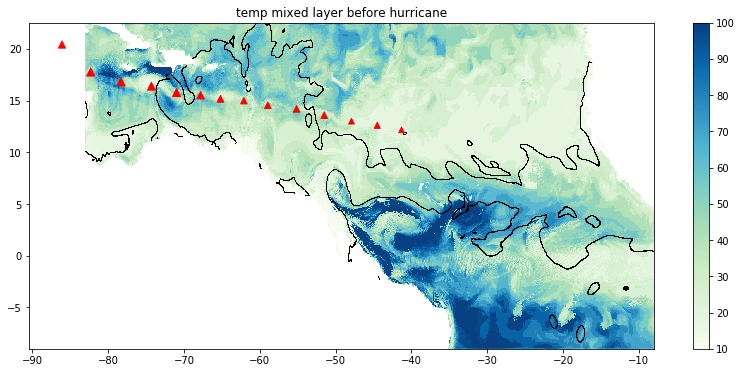

In [747]:
# plume 叠加上 plume boundary, hurricane track 
lat=nc2.variables["lat_rho"][:,0]
lon=nc2.variables["lon_rho"][0,:]
fig = plt.figure(figsize=(14,6))
X,Y = np.meshgrid(lon, lat)
# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1)
p = ax.pcolor(X, Y, -1*mld_t3, vmin=10, vmax=100,cmap=cm.GnBu)
# ax.title("temp mixed layer Aug 14th")
cb = fig.colorbar(p)

levels = [35.4,35.41]
cc=ax.contourf(X, Y, salt2[0,:,:], levels, colors='k', linestyles='-', lw=4)
# plt.clabel(cc, inline=True, fontsize=1)

xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30,-86.10]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76,20.41]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05,50.95]
s = vmax*5
plt.scatter(xh, yh, s, c="r", marker='^',label="Dean track")
ax.set_title('temp mixed layer before hurricane')

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5,1,'temp mixed layer after hurricane')

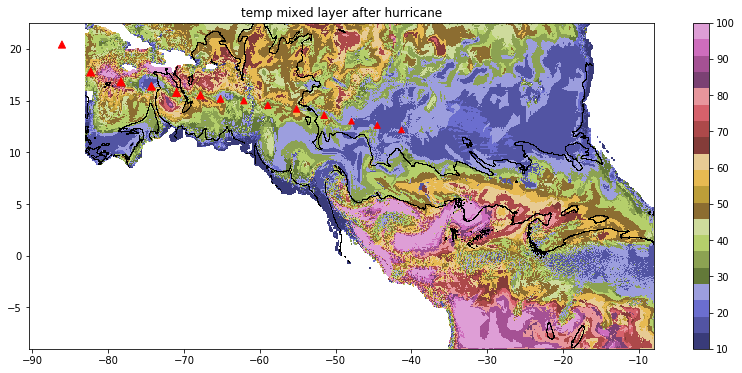

In [748]:
# plume 叠加上 plume boundary, hurricane track 
lat=nc2.variables["lat_rho"][:,0]
lon=nc2.variables["lon_rho"][0,:]

fig = plt.figure(figsize=(14,6))
X,Y = np.meshgrid(lon, lat)
# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1)
p = ax.pcolor(X, Y, -1*mld_t3, vmin=10, vmax=100,cmap=cm.tab20b)
# ax.title("temp mixed layer Aug 14th")
cb = fig.colorbar(p)

levels = [35.4,35.41]
cc=ax.contourf(X, Y, salt3[0,:,:], levels, colors='k', linestyles='-', lw=4)
# plt.clabel(cc, inline=True, fontsize=1)

xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30,-86.10]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76,20.41]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05,50.95]
s = vmax*5
plt.scatter(xh, yh, s, c="r", marker='^',label="Dean track")
ax.set_title('temp mixed layer after hurricane')

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5,1,'temp mixed layer difference')

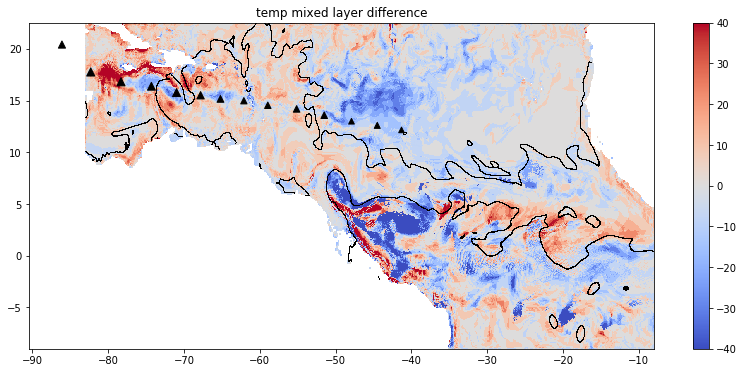

In [749]:
mld_t=mld_t3-mld_t2
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1)
X,Y = np.meshgrid(lon, lat)
p = ax.pcolor(X, Y, -1*mld_t, vmin=-40, vmax=40,cmap=cm.coolwarm)
cb = fig.colorbar(p)
levels = [35.4,35.41]
cc=ax.contourf(X, Y, salt2[0,:,:], levels, colors='k', linestyles='-', lw=4)
# plt.clabel(cc, inline=True, fontsize=1)

xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30,-86.10]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76,20.41]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05,50.95]
s = vmax*5
plt.scatter(xh, yh, s, c="k", marker='^',label="Dean track")
ax.set_title('temp mixed layer difference')

### 计算 density 的 mixed layer 

In [667]:
mld_r2=np.full_like(temp2[0,:,:],None)
mld_r3=np.full_like(temp3[0,:,:],None)
[depth, rows, cols]=temp2.shape
temp3[temp3==temp3[1,1]]=None
salt3[salt3==salt3[1,1]]=None

In [668]:
for i in range(rows-1):
    for j in range(cols-1):
        if temp3[0,i,j]!=None:
            mld_r3[i,j]=mld_density(temp3[:,i,j],salt3[:,i,j],z1[:,i,j])

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/seawater/library.py:415: RuntimeWarning: overflow encountered in multiply
  return (a[0] + (a[1] + (a[2] + (a[3] + (a[4] + a[5] * T68) * T68) * T68) *
/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/seawater/eos80.py:413: RuntimeWarning: overflow encountered in multiply
  s ** 0.5 + d * s ** 2)
/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/seawater/eos80.py:413: RuntimeWarning: invalid value encountered in add
  s ** 0.5 + d * s ** 2)
/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/seawater/eos80.py:413: RuntimeWarning: overflow encountered in square
  s ** 0.5 + d * s ** 2)
/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/seawater/library.py:300: RuntimeWarning: overflow encountere

In [669]:
for i in range(rows-1):
    for j in range(cols-1):
        if temp2[0,i,j]!=None:
            mld_r2[i,j]=mld_density(temp2[:,i,j],salt2[:,i,j],z1[:,i,j])

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/seawater/library.py:415: RuntimeWarning: overflow encountered in multiply
  return (a[0] + (a[1] + (a[2] + (a[3] + (a[4] + a[5] * T68) * T68) * T68) *
/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/seawater/eos80.py:413: RuntimeWarning: overflow encountered in multiply
  s ** 0.5 + d * s ** 2)
/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/seawater/eos80.py:413: RuntimeWarning: invalid value encountered in add
  s ** 0.5 + d * s ** 2)
/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/seawater/eos80.py:413: RuntimeWarning: overflow encountered in square
  s ** 0.5 + d * s ** 2)
/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/seawater/library.py:300: RuntimeWarning: overflow encountere

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5,1,'density mixed layer before hurricane')

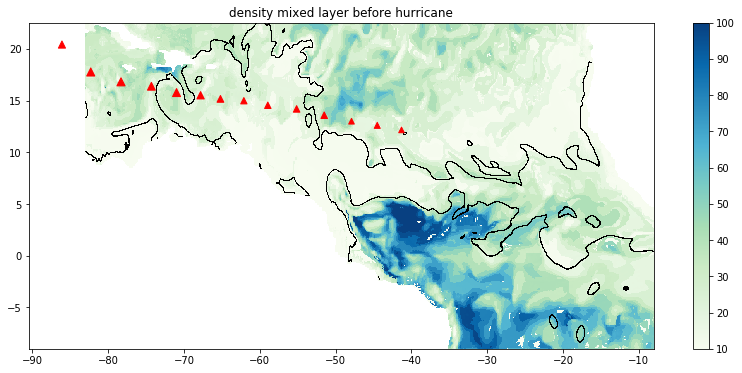

In [750]:
fig = plt.figure(figsize=(14,6))
# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1)
p = ax.pcolor(X, Y, -1*mld_r2, vmin=10, vmax=100,cmap=cm.GnBu)
cb = fig.colorbar(p) 
levels = [35.4,35.41]
cc=ax.contourf(X, Y, salt2[0,:,:], levels, colors='k', linestyles='-', lw=4)
# plt.clabel(cc, inline=True, fontsize=1)

xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30,-86.10]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76,20.41]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05,50.95]
s = vmax*5
plt.scatter(xh, yh, s, c="r", marker='^',label="Dean track")
ax.set_title('density mixed layer before hurricane')

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5,1,'density mixed layer after hurricane')

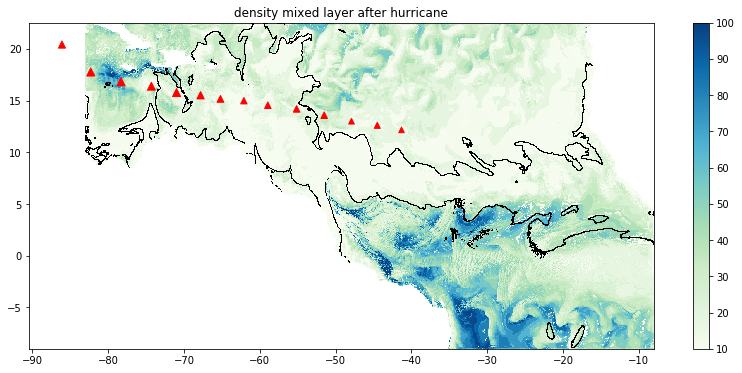

In [751]:
fig = plt.figure(figsize=(14,6))
# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1)
p = ax.pcolor(X, Y, -1*mld_r3, vmin=10, vmax=100,cmap=cm.GnBu)
cb = fig.colorbar(p) 
levels = [35.4,35.41]
cc=ax.contourf(X, Y, salt3[0,:,:], levels, colors='k', linestyles='-', lw=4)
# plt.clabel(cc, inline=True, fontsize=1)

xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30,-86.10]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76,20.41]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05,50.95]
s = vmax*5
plt.scatter(xh, yh, s, c="r", marker='^',label="Dean track")
ax.set_title('density mixed layer after hurricane')

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5,1,'density mixed layer difference')

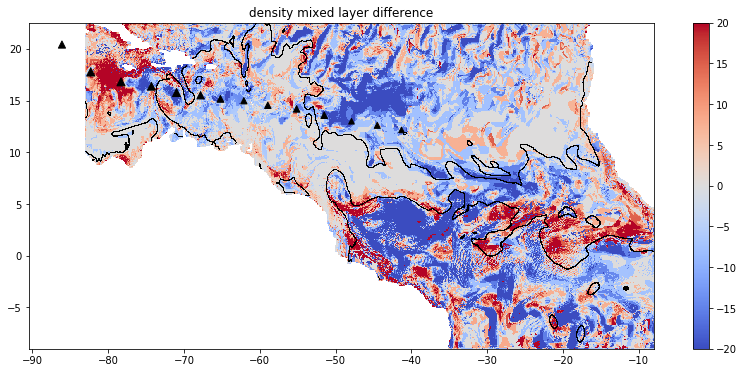

In [752]:
mld_r=mld_r3-mld_r2
fig = plt.figure(figsize=(14,6))
# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1)
p = ax.pcolor(X, Y, -1*mld_r, vmin=-20, vmax=20,cmap=cm.coolwarm)
cb = fig.colorbar(p) 
levels = [35.4,35.41]
cc=ax.contourf(X, Y, salt2[0,:,:], levels, colors='k', linestyles='-', lw=4)
# plt.clabel(cc, inline=True, fontsize=1)

xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30,-86.10]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76,20.41]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05,50.95]
s = vmax*5
plt.scatter(xh, yh, s, c="k", marker='^',label="Dean track")
ax.set_title('density mixed layer difference')

### 计算 barrier layer

In [673]:
# barrier layer
blt2=mld_t2-mld_r2
blt3=mld_t3-mld_r3

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5,1,'barrier layer before hurricane')

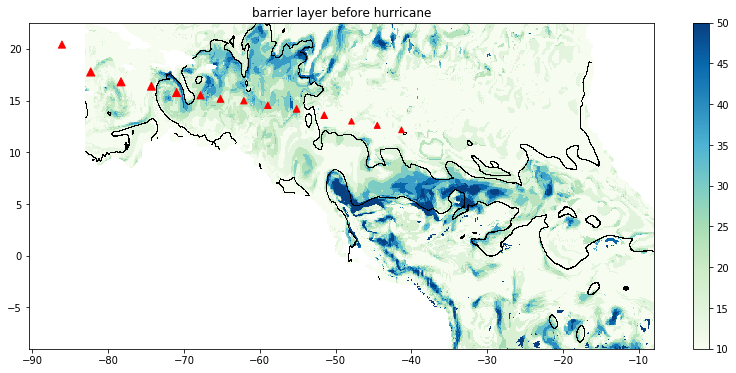

In [757]:
fig = plt.figure(figsize=(14,6))
# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1)
p = ax.pcolor(X, Y, -1*blt2, vmin=10, vmax=50,cmap=cm.GnBu)
cb = fig.colorbar(p)
levels = [35.4,35.41]
cc=ax.contourf(X, Y, salt2[0,:,:], levels, colors='k', linestyles='-', lw=4)
xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30,-86.10]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76,20.41]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05,50.95]
s = vmax*5
plt.scatter(xh, yh, s, c="r", marker='^',label="Dean track")
ax.set_title('barrier layer before hurricane')

In [675]:
# fig = plt.figure(figsize=(14,6))
# # `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
# ax = fig.add_subplot(1, 1, 1)
# p = ax.pcolor(X, Y, -1*blt3, vmin=10, vmax=100,cmap=cm.GnBu)
# cb = fig.colorbar(p) 

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5,1,'barrier layer difference')

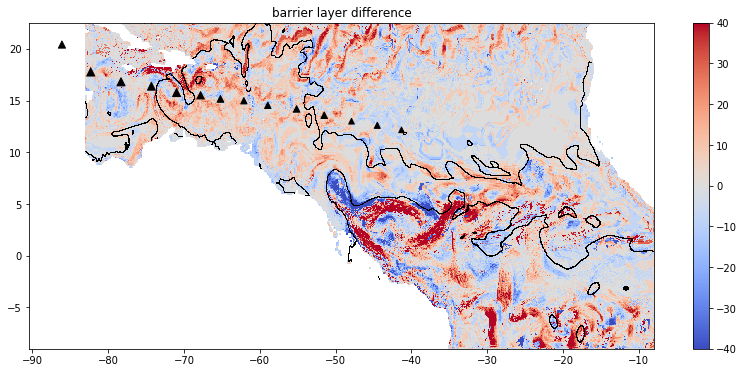

In [754]:
blt=blt3-blt2
fig = plt.figure(figsize=(14,6))
# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1)
p = ax.pcolor(X, Y, -1*blt, vmin=-40, vmax=40,cmap=cm.coolwarm)
cb = fig.colorbar(p) 
levels = [35.4,35.41]
cc=ax.contourf(X, Y, salt2[0,:,:], levels, colors='k', linestyles='-', lw=4)
xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30,-86.10]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76,20.41]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05,50.95]
s = vmax*5
plt.scatter(xh, yh, s, c="k", marker='^',label="Dean track")
ax.set_title('barrier layer difference')

### temp difference and salinity difference

In [694]:
# analysis the CRESM results
nc2=Dataset(path+'TXGLO.ocn.hi.2007-08-14_21:00:00.nc')
nc3=Dataset(path+'TXGLO.ocn.hi.2007-08-20_21:00:00.nc')
temp3=nc3.variables["temp"][0,::-1,:,:]
temp2=nc2.variables["temp"][0,::-1,:,:]
salt3=nc3.variables["salt"][0,::-1,:,:]
salt2=nc2.variables["salt"][0,::-1,:,:]
temp3=np.squeeze(temp3)  #删除没有必要的维度
temp2=np.squeeze(temp2)
salt3=np.squeeze(salt3)
salt2=np.squeeze(salt2)

lat=nc2.variables["lat_rho"][:,0]
lon=nc2.variables["lon_rho"][0,:]
X,Y = np.meshgrid(lon, lat)

In [574]:
lat

masked_array(data=[-9.        , -8.91769264, -8.83536663, -8.75302215,
                   -8.67065936, -8.58827843, -8.50587952, -8.42346279,
                   -8.34102842, -8.25857658, -8.17610742, -8.09362112,
                   -8.01111784, -7.92859775, -7.84606102, -7.76350782,
                   -7.68093832, -7.59835267, -7.51575106, -7.43313365,
                   -7.35050061, -7.2678521 , -7.1851883 , -7.10250938,
                   -7.0198155 , -6.93710684, -6.85438356, -6.77164584,
                   -6.68889384, -6.60612774, -6.5233477 , -6.4405539 ,
                   -6.3577465 , -6.27492568, -6.1920916 , -6.10924445,
                   -6.02638438, -5.94351158, -5.86062621, -5.77772844,
                   -5.69481844, -5.6118964 , -5.52896247, -5.44601684,
                   -5.36305966, -5.28009113, -5.1971114 , -5.11412065,
                   -5.03111906, -4.94810679, -4.86508402, -4.78205093,
                   -4.69900767, -4.61595444, -4.5328914 , -4.44981872,
      

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5,1,'Temp Difference From CRESM Day 21-Day 14')

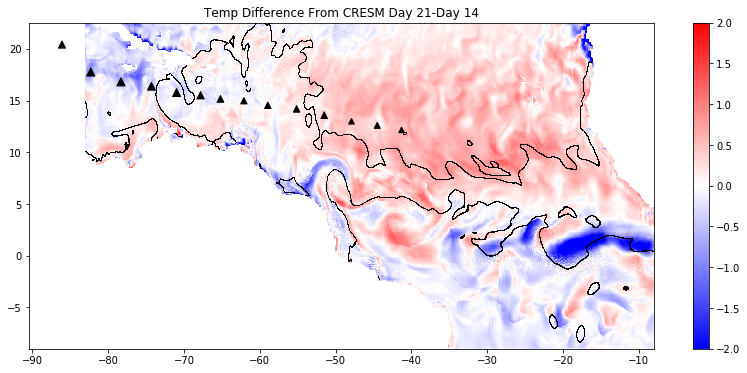

In [758]:

tempd=temp3[0,:,:]-temp2[0,:,:]
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 1, 1)
p = ax.pcolor(X, Y, tempd, vmin=-2, vmax=2,cmap=cm.bwr)  #cm.nipy_spectral, RdBu_r
cb = fig.colorbar(p) 
levels = [35.4,35.41]
cc=ax.contourf(X, Y, salt2[0,:,:], levels, colors='k', linestyles='-', lw=6)
xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30,-86.10]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76,20.41]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05,50.95]
s = vmax*5
plt.scatter(xh, yh, s, c="k", marker='^',label="Dean track")
ax.set_title('Temp Difference From CRESM Day 21-Day 14')

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5,1,'Temp on Day 21')

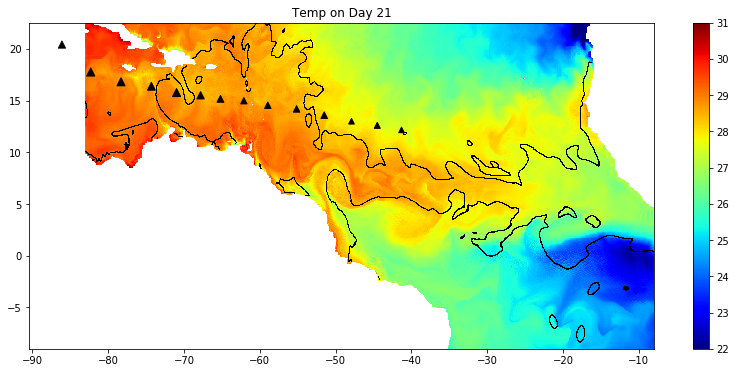

In [756]:
tempd=temp3[0,:,:]
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 1, 1)
p = ax.pcolor(X, Y, tempd, vmin=22, vmax=31,cmap=cm.jet)  #cm.nipy_spectral, RdBu_r
cb = fig.colorbar(p) 
levels = [35.4,35.41]
cc=ax.contourf(X, Y, salt2[0,:,:], levels, colors='k', linestyles='-', lw=6)
xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30,-86.10]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76,20.41]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05,50.95]
s = vmax*5
plt.scatter(xh, yh, s, c="k", marker='^',label="Dean track")
ax.set_title('Temp on Day 21')

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5,1,'Temp before hurricane')

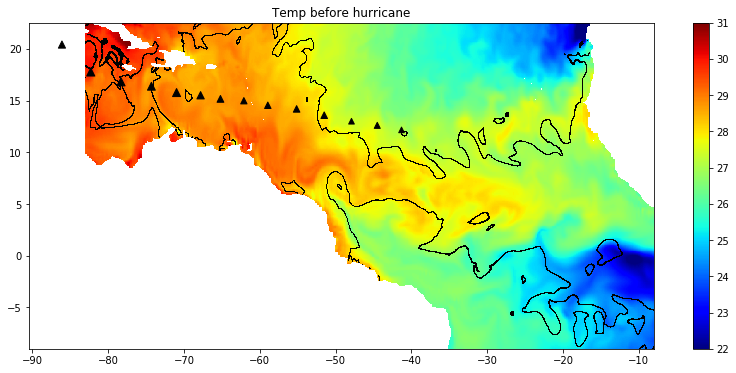

In [699]:

tempd=temp2[0,:,:]
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 1, 1)
p = ax.pcolor(X, Y, tempd, vmin=22, vmax=31,cmap=cm.jet)  #cm.nipy_spectral, RdBu_r,tab20b
cb = fig.colorbar(p) 
levels = [35.8,35.81]
cc=ax.contourf(X, Y, salt2[0,:,:], levels, colors='k', linestyles='-', lw=6)
xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30,-86.10]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76,20.41]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05,50.95]
s = vmax*5
plt.scatter(xh, yh, s, c="k", marker='^',label="Dean track")
ax.set_title('Temp before hurricane')

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5,1,'salinity difference')

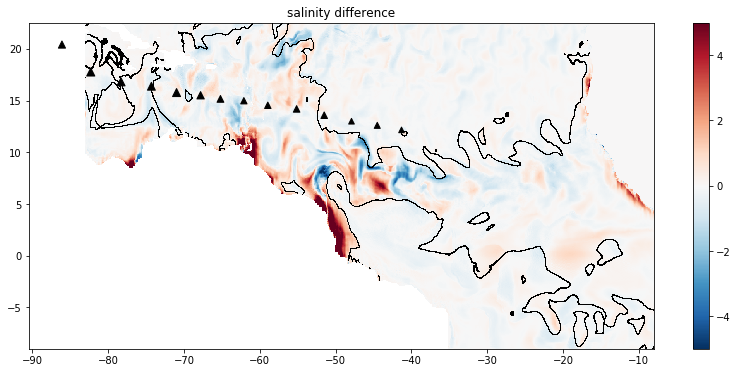

In [509]:
# salinity difference and salinity difference
tempd=salt3[0,:,:]-salt2[0,:,:]
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 1, 1)
p = ax.pcolor(X, Y, tempd,cmap=cm.RdBu_r,vmin=-5, vmax=5)  #cm.nipy_spectral, RdBu_r ,tab20b 
cb = fig.colorbar(p) 
levels = [35.8,35.81]
cc=ax.contourf(X, Y, salt2[0,:,:], levels, colors='k', linestyles='-', lw=4)
xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30,-86.10]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76,20.41]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05,50.95]
s = vmax*5
plt.scatter(xh, yh, s, c="k", marker='^',label="Dean track")
ax.set_title('salinity difference')

In [127]:
np.where(salt2==9.9999999e+36)=np.nan

SyntaxError: can't assign to function call (<ipython-input-127-060b1445ca00>, line 1)

/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


Text(0.5,1,'salinity before hurricane')

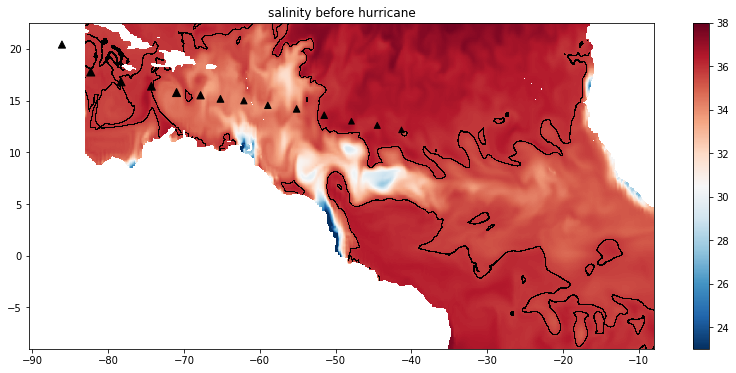

In [700]:
# salinity difference and salinity difference
tempd=salt2[0,:,:]
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 1, 1)
p = ax.pcolor(X, Y, tempd, cmap=cm.RdBu_r,vmin=23, vmax=38)  #cm.nipy_spectral, RdBu_r ,tab20b 
cb = fig.colorbar(p) 
levels = [35.8,35.81]
cc=ax.contourf(X, Y, salt2[0,:,:], levels, colors='k', linestyles='-', lw=4)
xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30,-86.10]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76,20.41]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05,50.95]
s = vmax*5
plt.scatter(xh, yh, s, c="k", marker='^',label="Dean track")
ax.set_title('salinity before hurricane')

### Copernicus BLT

### deal with ARGO files 

In [71]:
 
hu_pa={                          # define the hurricane track
    "days":[i for i in range(16,22)],
    "lat":[13.2,14.4,15.4,16.8,17.8,18.9],
    "lon":[-51.3,-61.7,-68,-74.3,-81.5,-88.7]
    
}
# hurricane_passage

In [72]:
 # choose the data around hurricane passages. 
for i, day_hu in enumerate(hu_pa["days"]):
    lat_hu=hu_pa["lat"][i]
    lon_hu=hu_pa["lon"][i]
    print (i, lat_hu)
    for j, days_a in enumerate(argo["days"]):
        lat_a=argo["lat"][i]
        lon_a=argo["lon"][i]
        print(range(lat_hu-2,lat_hu+2)
        if lat_hu-2<= lat_a <= lat_hu+2:
            print(lat_a)

SyntaxError: invalid syntax (<ipython-input-72-4e2cc73638da>, line 10)

In [ ]:
from netCDF4 import Dataset, num2date
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os
# data downloaded from the form at
# http://coastwatch.pfeg.noaa.gov/erddap/tabledap/apdrcArgoAll.html
filename, headers = urllib.urlretrieve('http://coastwatch.pfeg.noaa.gov/erddap/tabledap/apdrcArgoAll.nc?longitude,latitude,time&longitude>=0&longitude<=360&latitude>=-90&latitude<=90&time>=2010-01-01&time<=2010-01-08&distinct()')
dset = Dataset(filename)
lats = dset.variables['latitude'][:]
lons = dset.variables['longitude'][:]
time = dset.variables['time']
times = time[:]
t1 = times.min(); t2 = times.max()
date1 = num2date(t1, units=time.units)
date2 = num2date(t2, units=time.units)
dset.close()
os.remove(filename)
# draw map with markers for float locations
m = Basemap(projection='hammer',lon_0=180)
x, y = m(lons,lats)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(x,y,3,marker='o',color='k')
plt.title('Locations of %s ARGO floats active between %s and %s' %\
        (len(lats),date1,date2),fontsize=12)
plt.show()

##### plot the terrian map

In [ ]:
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np

map = Basemap(projection='tmerc',                          # use basemap 
              lat_0=0, lon_0=3,
              llcrnrlon=1.819757266426611, 
              llcrnrlat=41.583851612359275, 
              urcrnrlon=1.841589961763497, 
              urcrnrlat=41.598674173123)

ds = gdal.Open("../sample_files/dem.tiff")
elevation = ds.ReadAsArray()                               # read the tiff data and elevation

map.imshow(plt.imread('../sample_files/orthophoto.jpg'))

map.imshow(elevation, cmap = plt.get_cmap('terrain'), alpha = 0.5)   # imshow, with the cmap, alpha

plt.show()

##### plot the wind with basemap

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np


map = Basemap(llcrnrlon=-93.7, llcrnrlat=28., urcrnrlon=-66.1, urcrnrlat=39.5,
              projection='lcc', lat_1=30., lat_2=60., lat_0=34.83158, lon_0=-98.)

ds = gdal.Open("../sample_files/wrf.tiff")
lons = ds.GetRasterBand(4).ReadAsArray()
lats = ds.GetRasterBand(5).ReadAsArray()
u10 = ds.GetRasterBand(1).ReadAsArray()
v10 = ds.GetRasterBand(2).ReadAsArray()
speed = np.sqrt(u10*u10 + v10*v10)

x, y = map(lons, lats)

yy = np.arange(0, y.shape[0], 4)
xx = np.arange(0, x.shape[1], 4)

points = np.meshgrid(yy, xx)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#cc9955', lake_color='aqua', zorder = 0)
map.drawcoastlines(color = '0.15')

map.quiver(x[points], y[points], 
    u10[points], v10[points], speed[points],
    cmap=plt.cm.autumn)

plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
from numpy import linspace
from numpy import meshgrid

map = Basemap(llcrnrlon=-93.7, llcrnrlat=28., urcrnrlon=-66.1, urcrnrlat=39.5,
              projection='lcc', lat_1=30., lat_2=60., lat_0=34.83158, lon_0=-98.)


data = mld_temp


xx, yy = meshgrid(lon, lat)

map.pcolormesh(xx, yy, data)
map.contourf(xx, yy, mask) 
plt.show()

In [ ]:
import netCDF4

# set up the figure
plt.figure()

# set up the URL to access the data server.
# See the NWW3 directory on NOMADS 
# for the list of available model run dates.

mydate='20171101'  # this needs to be a recent data since only recent models are available for download
url='http://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+ mydate+'/nww3'+mydate+'_00z'

# Extract the significant wave height of combined wind waves and swell

file = netCDF4.Dataset(url)
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
data = file.variables['htsgwsfc'][1,:,:]
file.close()

# Since Python is object oriented, you can explore the contents of the NOMADS
# data set by examining the file object, such as file.variables.

# The indexing into the data set used by netCDF4 is standard python indexing.
# In this case we want the first forecast step, but note that the first time 
# step in the RTOFS OpenDAP link is all NaN values.  So we start with the 
# second timestep

# Plot the field using Basemap.  Start with setting the map
# projection using the limits of the lat/lon data itself:
fig=plt.figure(figsize=(12, 8) )

# Miller projection:
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')


# convert the lat/lon values to x/y projections.

x, y = m(*np.meshgrid(lon,lat))

# plot the field using the fast pcolormesh routine 
# set the colormap to jet.

m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
m.colorbar(location='right')

# Add a coastline and axis values.

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.

plt.title('Example 1: NWW3 Significant Wave Height from NOMADS');